In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import matplotlib.pyplot as plt 
import plotly.offline as py 

import plotly.graph_objs as go 

import warnings
warnings.filterwarnings('ignore')


In [126]:
data=pd.read_csv("googleplaystore.csv")

In [127]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [128]:
data.shape

(10841, 13)

In [129]:
total=data.isnull().sum()

In [130]:
total

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [131]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092
App,0,0.000000


In [132]:
data.dropna(how="any",inplace=True)

Text(0, 0.5, 'Frekans')

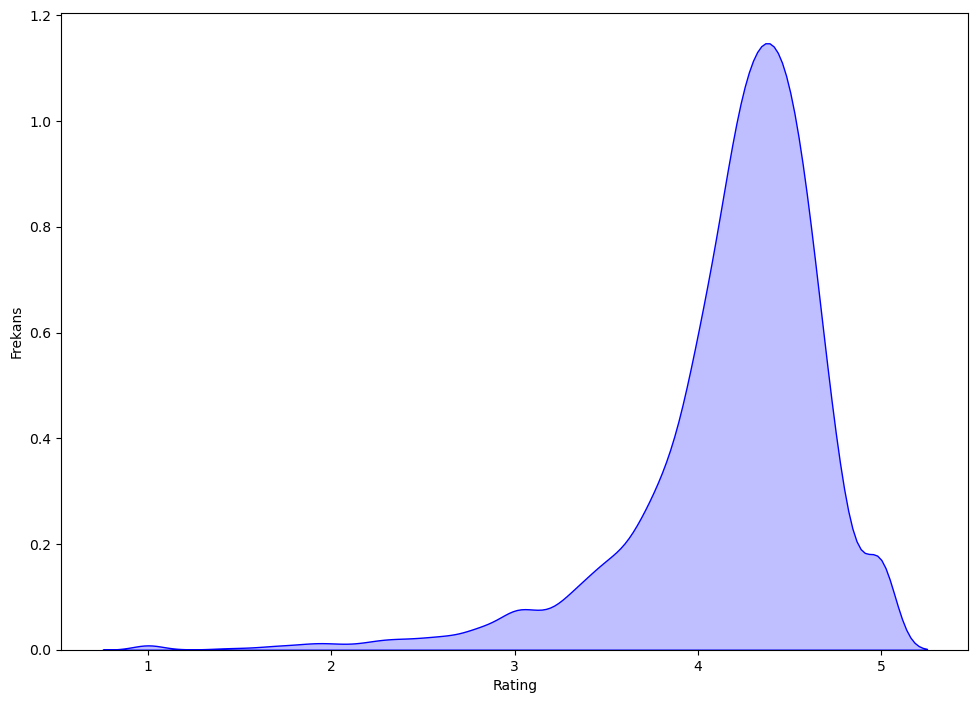

In [133]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=11.7,8.27
g=sns.kdeplot(data.Rating,color="Blue",shade=True)
g.set_xlabel("Rating")
g.set_ylabel("Frekans")

In [134]:
len(data["Category"].unique()),"categories"

(33, 'categories')

In [135]:
data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Text(0.5, 1.0, 'Kategori Sıralaması')

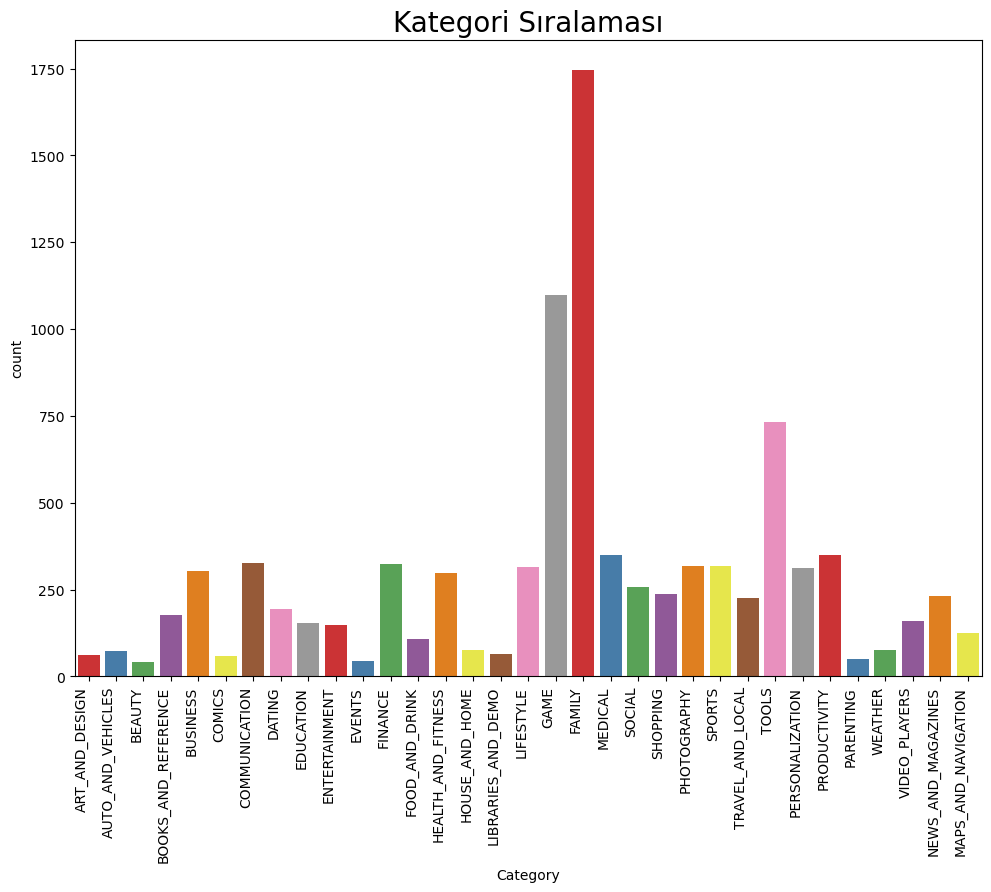

In [136]:
g=sns.countplot(x="Category",data=data,palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=90,ha="right")
g
plt.title("Kategori Sıralaması",size=20)

Text(0.5, 1.0, 'Kategori Rating Grafiği')

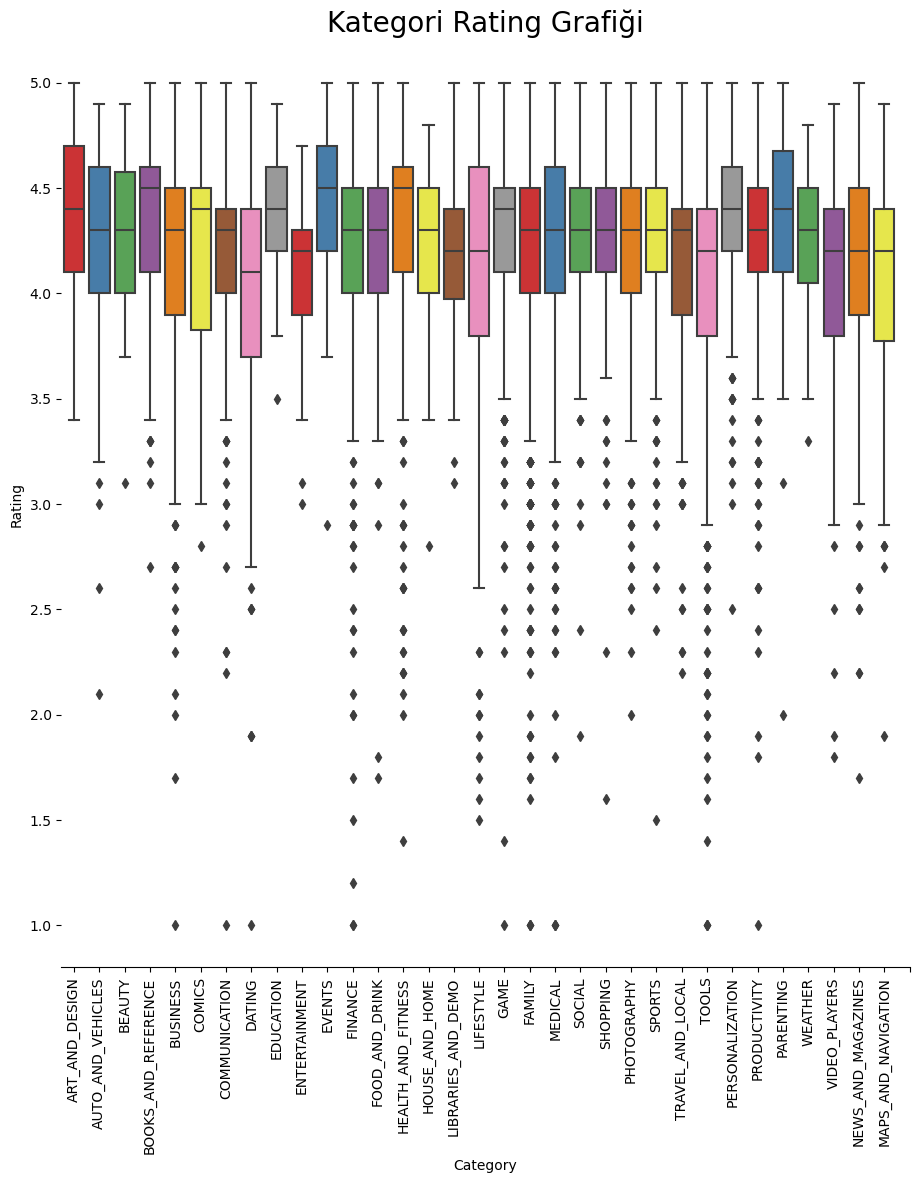

In [137]:
g=sns.catplot(x="Category",y="Rating",data=data,kind="box",height=10,palette="Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set(xticks=range(0,34))
g=g.set_xlabels("Category")
g=g.set_ylabels("Rating")
plt.title("Kategori Rating Grafiği",size=20)

Review değerlerini int a çeviricez, üzerinde işlem yapabilmek için.

In [138]:
data["Reviews"]=data["Reviews"].apply(lambda x: int(x))

In [139]:
data["Reviews"].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

Text(0.5, 1.0, 'Reviews Frekansı')

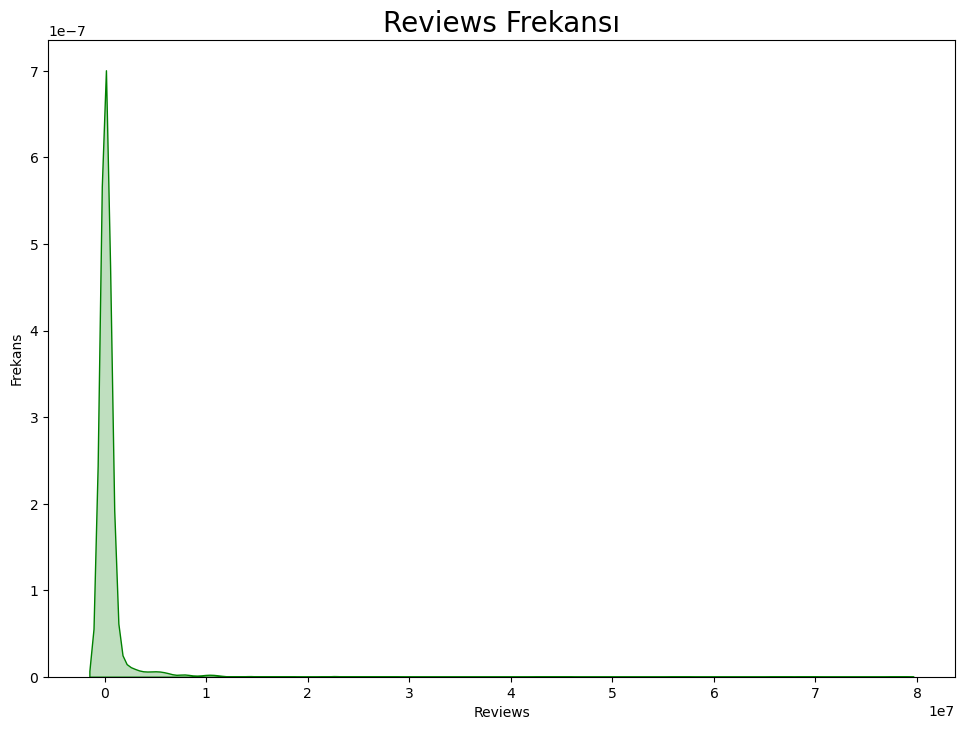

In [140]:
plt.rcParams["figure.figsize"]=11.7,8.27
g=sns.kdeplot(data.Reviews,color="Green",shade=True)
g.set_xlabel("Reviews")
g.set_ylabel("Frekans")
plt.title("Reviews Frekansı",size=20)

In [141]:
data[data.Reviews>5000000].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device
365,WeChat,COMMUNICATION,4.2,5387333,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 31, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
385,Viber Messenger,COMMUNICATION,4.3,11334973,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device


In [142]:
len(data[data.Reviews>5000000])

230

<Figure size 1000x1000 with 0 Axes>

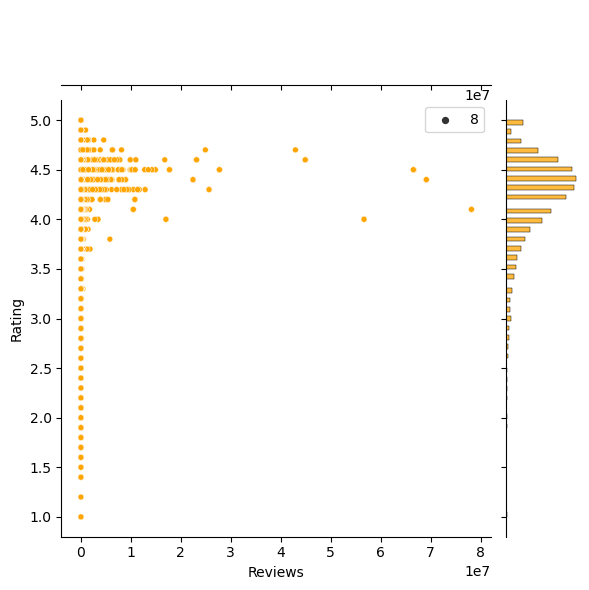

In [143]:
plt.figure(figsize=(10,10))
g=sns.jointplot(x="Reviews",y="Rating",color="orange",data=data,size=8)

Text(0.5, 1.0, 'Rating Reviews')

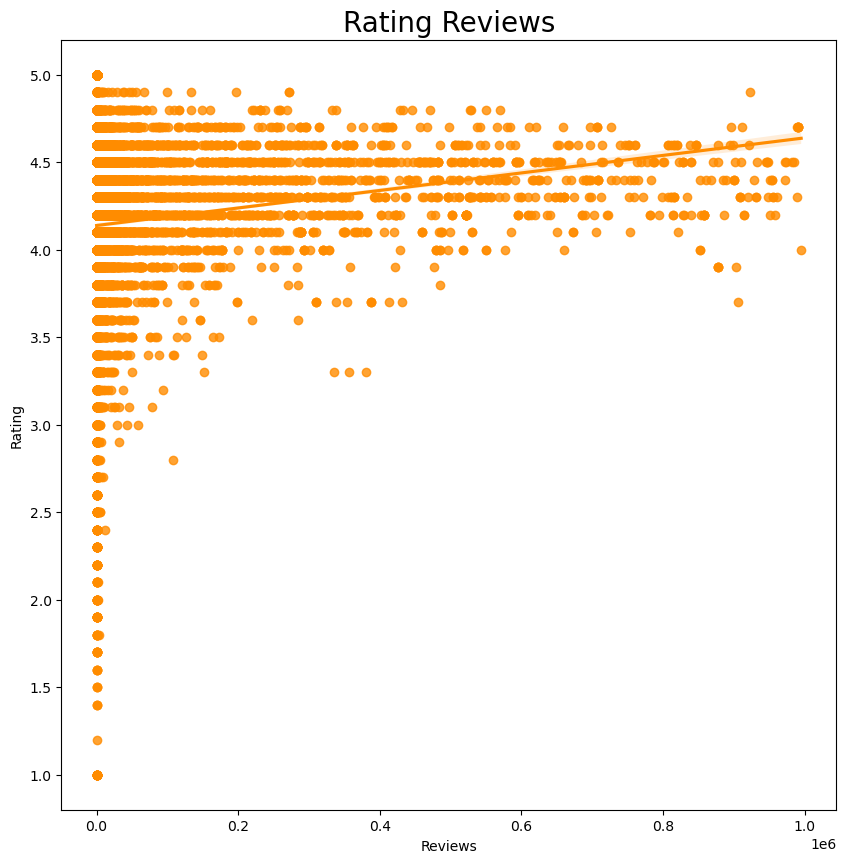

In [144]:
plt.figure(figsize=(10,10))
sns.regplot(x="Reviews",y="Rating",color="darkorange",data=data[data["Reviews"]<1000000]);
plt.title("Rating Reviews",size=20)

In [145]:
data["Size"].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [146]:
data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [147]:
len(data[data.Size=="Varies with device"])

1637

In [148]:
data["Size"].replace("Varies with device",np.NaN,inplace=True)

In [149]:
data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', nan, '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M',
       '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M',
       '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M',
       '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M',
       '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M',
       '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M', '3.7M',
       '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M', '3.0M',
       '7.2M', 

In [150]:
data.Size=(data.Size.replace(r'[kM]+$','',regex=True).astype(float) * \
           data.Size.str.extract(r'[\d.]+([KM]+)',expand=False)
           .fillna(1)
           .replace(['k','M'],[10**3,10**6]).astype(int))

In [151]:
data["Size"].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 5.50e+06, 1.70e+07, 3.90e+07, 3.10e+07,
       4.20e+06, 2.30e+07, 6.00e+06, 6.10e+06, 4.60e+06, 9.20e+06,
       5.20e+06, 1.10e+07, 2.40e+07,      nan, 9.40e+06, 1.50e+07,
       1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06, 7.90e+06, 5.60e+07,
       5.70e+07, 3.50e+07, 5.40e+07, 2.01e+02, 3.60e+06, 5.70e+06,
       8.60e+06, 2.40e+06, 2.70e+07, 2.70e+06, 2.50e+06, 7.00e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 2.20e+07, 6.40e+06, 3.20e+06, 8.20e+06, 4.90e+06,
       9.50e+06, 5.00e+06, 5.90e+06, 1.30e+07, 7.30e+07, 6.80e+06,
       3.50e+06, 4.00e+06, 2.30e+06, 2.10e+06, 4.20e+07, 9.10e+06,
       5.50e+07, 2.30e+01, 7.30e+06, 6.50e+06, 1.50e+06, 7.50e

In [152]:
data["Size"].fillna(data.groupby("Category")["Size"].transform("mean"),inplace=True)

<Figure size 1000x1000 with 0 Axes>

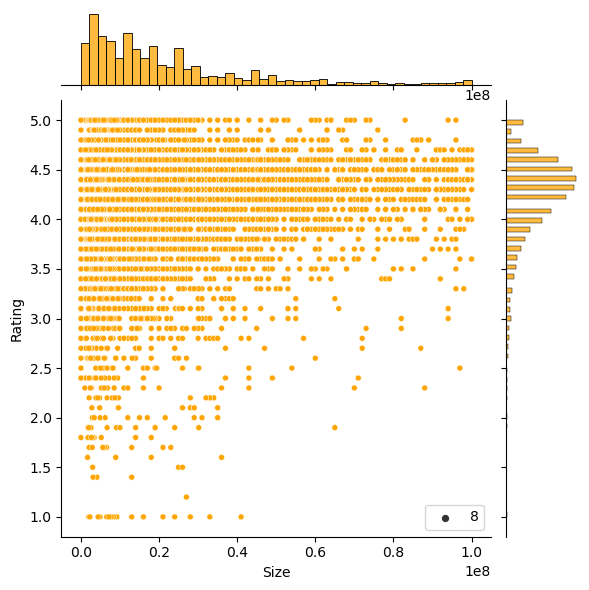

In [153]:
plt.figure(figsize=(10,10))
g=sns.jointplot(x="Size",y="Rating",color="orange",data=data,size=8)

In [154]:
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.apply(lambda x: x.replace('+',''))
data.Installs= data.Installs.apply(lambda x: int(x))

In [155]:
data["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [156]:
data["Installs"].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [157]:
sorted_value=sorted(list(data["Installs"].unique()))

In [158]:
sorted_value

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

In [159]:
data["Installs"].replace(sorted_value,range(0,len(sorted_value),1),inplace=True)

In [160]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [161]:
data.sort_values("Installs")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10697,Mu.F.O.,GAME,5.0,2,1.600000e+07,0,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2,2.000000e+07,0,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,2.500000e+07,0,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.600000e+06,1,Free,0,Everyone,Medical,"August 2, 2018",2.0,4.0 and up
10562,FK Atlantas,SPORTS,1.5,2,2.600000e+07,1,Free,0,Everyone,Sports,"February 21, 2018",1.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,1.241000e+07,18,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
464,Hangouts,COMMUNICATION,4.0,3419513,1.241000e+07,18,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,1.916498e+07,18,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.241000e+07,18,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


Text(0.5, 1.0, 'rating vs installs')

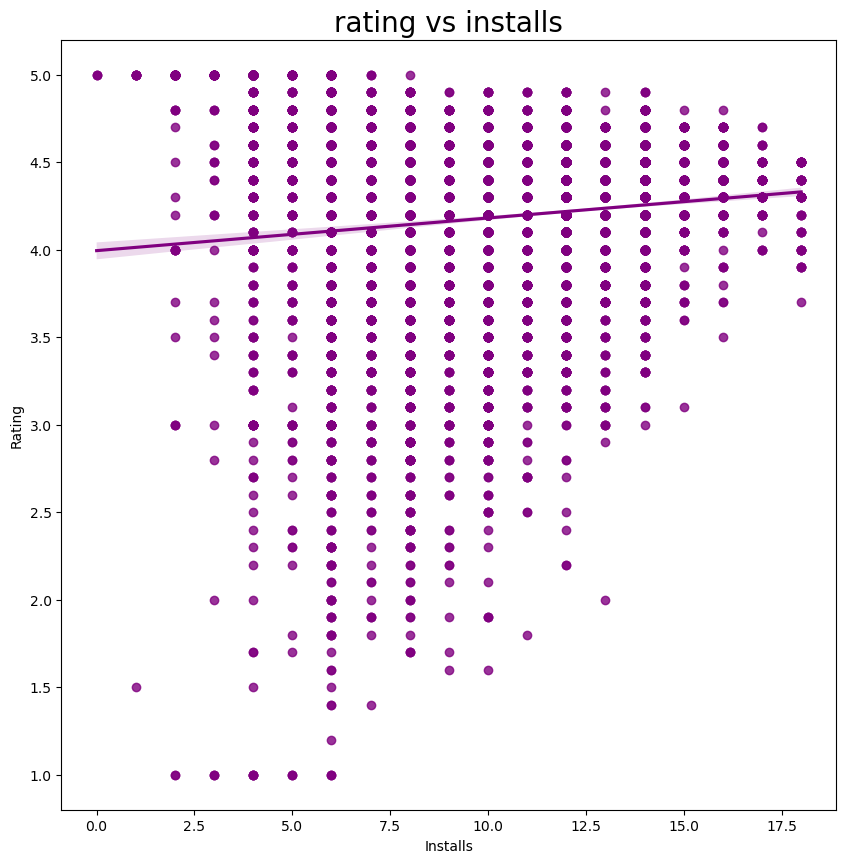

In [162]:
plt.figure(figsize=(10,10))
sns.regplot(x="Installs",y="Rating",color="purple",data=data)
plt.title("rating vs installs",size=20)

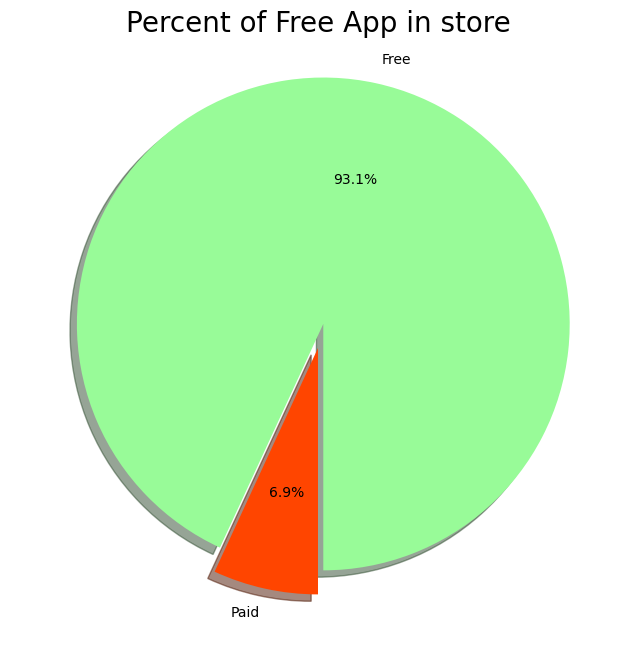

In [163]:
labels=data['Type'].value_counts(sort=True).index
sizes=data['Type'].value_counts(sort=True)

colors=["palegreen","orangered"]
explode=(0.1,0)

plt.rcParams['figure.figsize']=8,8
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=270,)
plt.title('Percent of Free App in store',size =20)
plt.show()

In [164]:
data['Free']=data['Type'].map(lambda s: 1 if s=='Free' else 0)
data.drop(['Type'],axis=1,inplace=True)

In [165]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [166]:
data.Price=data.Price.apply(lambda x: x.replace('$',''))
data['Price']=data['Price'].apply(lambda x: float(x))

In [167]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [168]:
data["Price"].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [169]:
data[data["Price"]==400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


In [170]:
data.loc[ data['Price'] == 0, 'PriceBand'] = '0 Bedava'
data.loc[(data['Price'] >0) & (data['Price']<=0.99),'PriceBand'] = ' 1 ucuz '
data.loc[(data['Price'] >0.99) & (data['Price']<=2.99),'PriceBand'] = ' 2 ucuz değil '
data.loc[(data['Price'] >2.99) & (data['Price']<=4.99),'PriceBand'] = ' 3 normal '
data.loc[(data['Price'] >4.99) & (data['Price']<=14.99),'PriceBand'] = ' 4 biraz pahalı '
data.loc[(data['Price'] >14.99) & (data['Price']<=29.99),'PriceBand'] = ' 5 pahalı '
data.loc[(data['Price'] >29.99),'PriceBand'] = ' 6 çok pahalı '

In [171]:
data[["PriceBand","Rating"]].groupby(["PriceBand"],as_index=False).mean()

,PriceBand,Rating
0,1 ucuz,4.300943
1,2 ucuz değil,4.292975
2,3 normal,4.250318
3,4 biraz pahalı,4.269149
4,5 pahalı,4.252000
5,6 çok pahalı,3.923810
6,0 Bedava,4.186288


In [172]:
data[data["Content Rating"]== "Unrated"]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1,0 Bedava


In [173]:
data=data[data["Content Rating"]!= "Unrated"]

In [174]:
data = pd.get_dummies(data, columns=["Content Rating"])

In [175]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0 Bedava,False,True,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0 Bedava,False,True,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0 Bedava,False,True,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0 Bedava,False,False,False,False,True
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0 Bedava,False,True,False,False,False


In [180]:
len(data["Genres"].unique()),"genres"

(115, 'genres')

In [181]:
data.Genres.value_counts().head(20)

Genres
Tools               731
Entertainment       533
Education           468
Action              358
Productivity        351
Medical             350
Sports              333
Communication       328
Finance             323
Photography         317
Lifestyle           313
Personalization     312
Business            303
Health & Fitness    297
Social              259
Shopping            238
News & Magazines    233
Travel & Local      225
Arcade              207
Dating              195
Name: count, dtype: int64

In [182]:
data.Genres.value_counts().tail(20)

Genres
Music & Audio;Music & Video            1
Communication;Creativity               1
Racing;Pretend Play                    1
Strategy;Education                     1
Role Playing;Brain Games               1
Puzzle;Education                       1
Lifestyle;Education                    1
Adventure;Brain Games                  1
Comics;Creativity                      1
Arcade;Pretend Play                    1
Health & Fitness;Action & Adventure    1
Health & Fitness;Education             1
Travel & Local;Action & Adventure      1
Board;Pretend Play                     1
Lifestyle;Pretend Play                 1
Parenting;Brain Games                  1
Card;Brain Games                       1
Tools;Education                        1
Entertainment;Education                1
Strategy;Creativity                    1
Name: count, dtype: int64

In [183]:
data["Genres"]=data["Genres"].str.split(";").str[0]

In [184]:
len(data["Genres"].unique()),"genres"

(48, 'genres')

In [185]:
data[["Genres","Rating"]].groupby(["Genres"],as_index=False).mean().sort_values("Rating").head(1)

,Genres,Rating
14,Dating,3.970769


In [186]:
data[["Genres","Rating"]].groupby(["Genres"],as_index=False).mean().sort_values("Rating").tail(10)

,Genres,Rating
28,Music & Audio,4.300000
6,Board,4.300000
2,Arcade,4.308072
15,Education,4.312433
31,Personalization,4.335256
7,Books & Reference,4.344444
3,Art & Design,4.367188
34,Puzzle,4.389116
47,Word,4.410714
18,Events,4.435556


Text(0.5, 1.0, 'Boxenplot of Rating VS Genres')

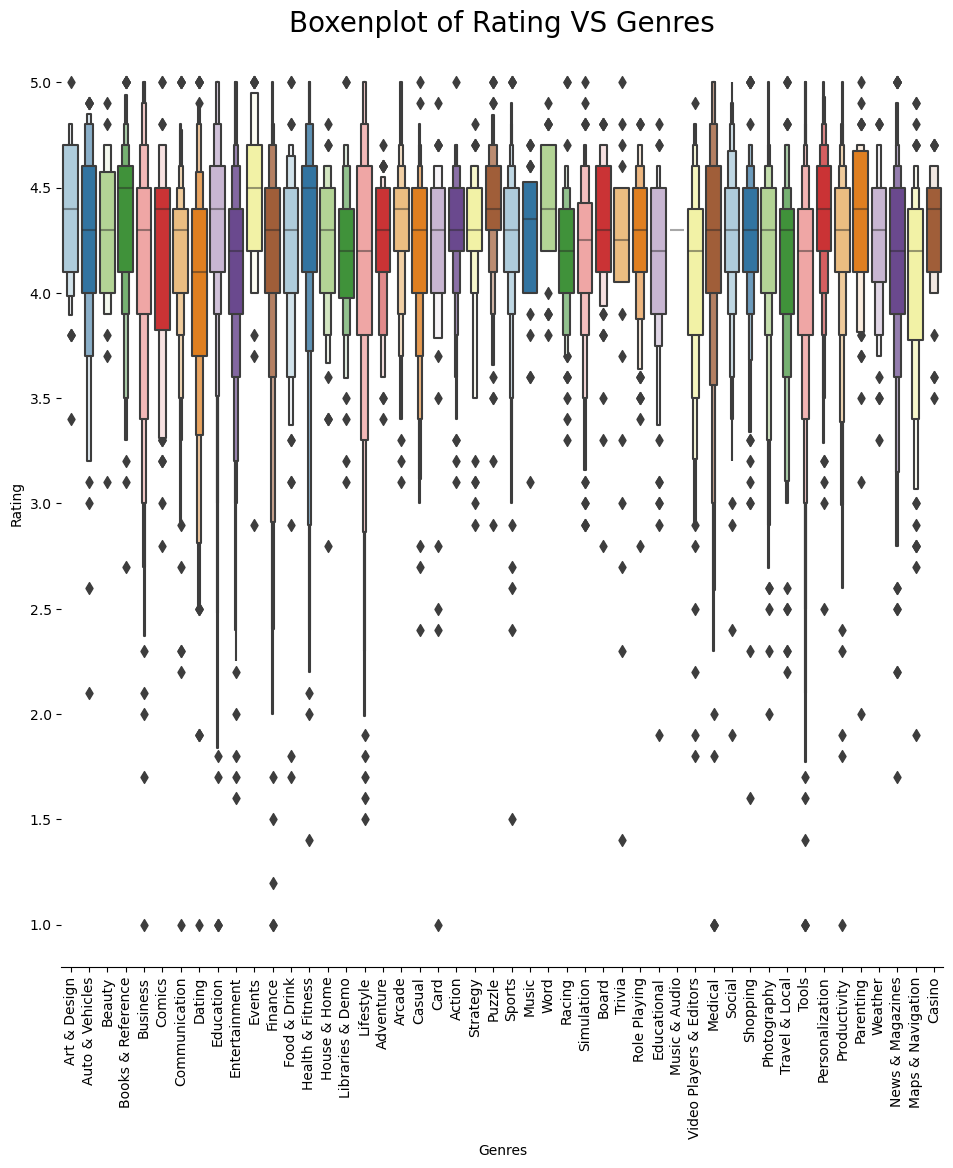

In [187]:
g=sns.catplot(x="Genres",y="Rating",data=data,kind="boxen",height=10,palette="Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g=g.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Genres',size=20)

In [188]:
data["Last Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [189]:
data["new"]=pd.to_datetime(data["Last Updated"])
data["new"].describe()

count                             9359
mean     2017-11-29 18:24:25.541190400
min                2010-05-21 00:00:00
25%                2017-10-09 00:00:00
50%                2018-06-01 00:00:00
75%                2018-07-24 00:00:00
max                2018-08-08 00:00:00
Name: new, dtype: object

In [190]:
data["new"][0]-data["new"].max()

Timedelta('-213 days +00:00:00')

In [192]:
data["lastupdate"]=(data["new"]-data["new"].max()).dt.days
data["lastupdate"].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: lastupdate, dtype: int64

Text(0.5, 1.0, 'rating vs last update')

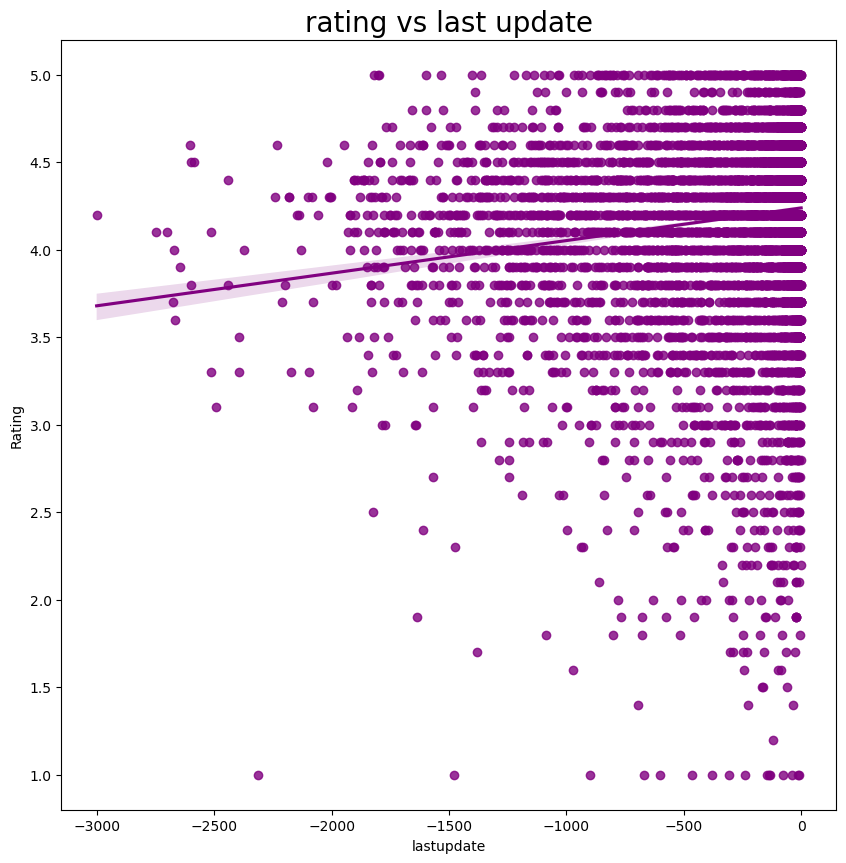

In [193]:
plt.figure(figsize=(10,10))
sns.regplot(x="lastupdate",y="Rating",color="purple",data=data);
plt.title("rating vs last update",size=20)